Assignment 20 for Monthly Milk Production Forecasting
Using RNN, LSTM, and GRU Deep Learning Models

# 1.	Exploratory Data Analysis (EDA)
*Visualize trends, seasonality, and anomalies in the milk production data.

*Check for any missing values or outliers.

*Normalize or scale the data for neural network models.


In [64]:
#Visualize trends, seasonality, and anomalies in the milk production data.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("monthly_milk_production.csv")

In [66]:
# Rename columns if needed
df.columns = ["Month", "Milk_Production"]

In [67]:
# Convert Month column into datetime format
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

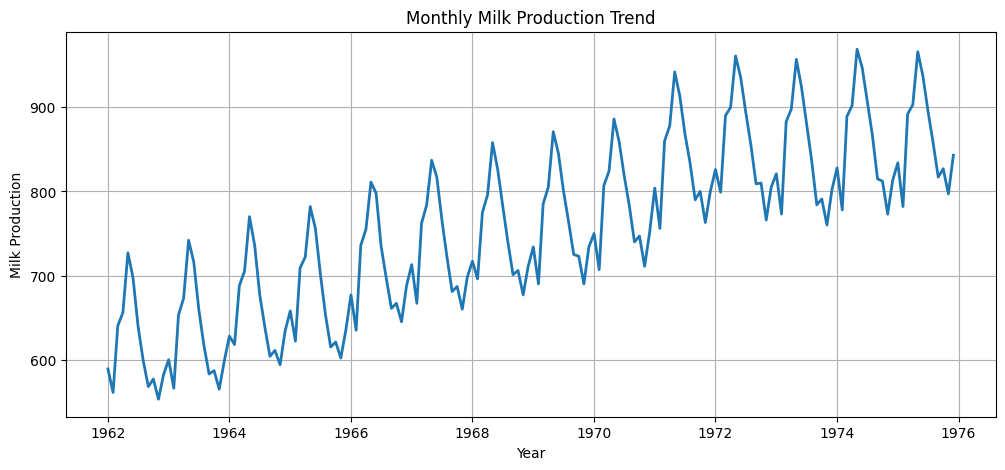

In [68]:
# ---- TREND & SEASONALITY PLOT ----
plt.figure(figsize=(12,5))
plt.plot(df["Milk_Production"], linewidth=2)
plt.title("Monthly Milk Production Trend")
plt.xlabel("Year")
plt.ylabel("Milk Production")
plt.grid(True)
plt.show()

In [69]:
# ---- YEARLY SEASONALITY PLOT ----
df["Year"] = df.index.year
df["Month_Num"] = df.index.month

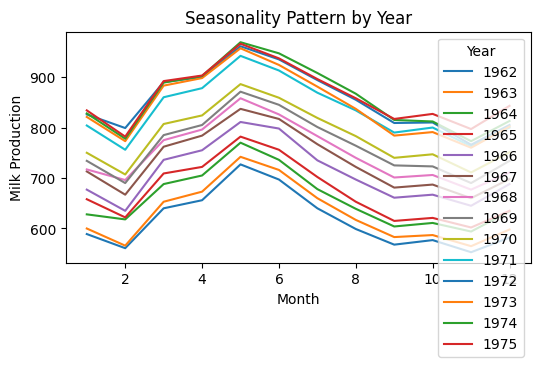

In [70]:
plt.figure(figsize=(6,3))
sns.lineplot(data=df, x="Month_Num", y="Milk_Production", hue="Year", palette="tab10")
plt.title("Seasonality Pattern by Year")
plt.xlabel("Month")
plt.ylabel("Milk Production")
plt.show()

In [71]:
#	Check for any missing values or outliers.
# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Milk_Production    0
Year               0
Month_Num          0
dtype: int64


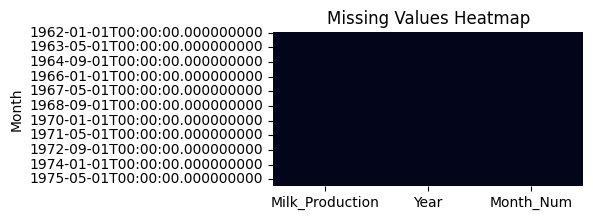

In [72]:
# Optionally visualize
plt.figure(figsize=(4,2))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

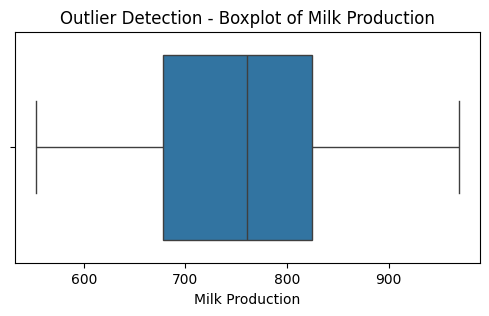

In [73]:
#Check for Outliers
plt.figure(figsize=(6,3))
sns.boxplot(data=df["Milk_Production"], orient="h")
plt.title("Outlier Detection - Boxplot of Milk Production")
plt.xlabel("Milk Production")
plt.show()

In [74]:
# Statistical summary
print(df["Milk_Production"].describe())

count    168.000000
mean     754.708333
std      102.204524
min      553.000000
25%      677.750000
50%      761.000000
75%      824.500000
max      969.000000
Name: Milk_Production, dtype: float64


In [75]:
#Normalize or scale the data for neural network models.
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Milk_Production"]])

In [77]:
# Convert to DataFrame for visibility
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=["Scaled_Milk_Production"])

In [78]:
print(scaled_df.head())

            Scaled_Milk_Production
Month                             
1962-01-01                0.086538
1962-02-01                0.019231
1962-03-01                0.209135
1962-04-01                0.247596
1962-05-01                0.418269


#2.	Data Preparation for Deep Learning
o	Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs.

o	Split data into training, validation, and test sets.

o	Reshape data for model input dimensions


In [79]:
#Create input-output sequences (time windows) suitable for training RNNs/LSTMs/GRUs.
import numpy as np

In [80]:
# Convert scaled milk production into a sequence
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])   # previous 12 months
        y.append(data[i, 0])                 # next month
    return np.array(X), np.array(y)

In [81]:
window_size = 12  # 12 months window
X, y = create_sequences(scaled_data, window_size)

In [82]:
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (156, 12)
Output shape: (156,)


In [83]:
# Split data into training, validation, and test sets.
train_size = int(len(X) * 0.70)
val_size = int(len(X) * 0.10)

In [84]:
X_train = X[:train_size]
y_train = y[:train_size]

In [85]:
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

In [86]:
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

In [87]:
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (109, 12)
Validation size: (15, 12)
Test size: (32, 12)


In [88]:
# Reshape data for model input dimensions.
# Reshaping to 3D format for RNN/LSTM/GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [89]:
print("Reshaped Training Data:", X_train.shape)
print("Reshaped Validation Data:", X_val.shape)
print("Reshaped Test Data:", X_test.shape)

Reshaped Training Data: (109, 12, 1)
Reshaped Validation Data: (15, 12, 1)
Reshaped Test Data: (32, 12, 1)


# 3.	Model Building
o	Build three separate models:

	Basic RNN

	LSTM

	GRU

o	Tune hyperparameters (e.g., window size, number of units, batch size, epochs).
o	Use appropriate loss functions and optimizers.


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam

In [91]:
# Hyperparameters
window_size = 12
units = 50
batch_size = 16
epochs = 50
learning_rate = 0.001

In [92]:
# RNN Model
rnn_model = Sequential([
    SimpleRNN(units, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
rnn_model.compile(optimizer=Adam(learning_rate), loss='mse')

In [94]:
rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
history_rnn = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.1804 - val_loss: 0.0170
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0309 - val_loss: 0.0175
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - val_loss: 0.0367
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028 - val_loss: 0.0123
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018 - val_loss: 0.0058
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017 - val_loss: 0.0039
E

Build the LSTM Model

In [96]:
lstm_model = Sequential([
    LSTM(units, input_shape=(window_size, 1)),
    Dense(1)
])

In [97]:
lstm_model.compile(
    optimizer=Adam(learning_rate),
    loss='mse'
)

In [98]:
lstm_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.1852 - val_loss: 0.2206
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0751 - val_loss: 0.0385
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0305 - val_loss: 0.0323
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0409 - val_loss: 0.0277
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0284 - val_loss: 0.0409
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0266 - val_loss: 0.0375
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0242 - val_loss: 0.0287
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0217 - val_loss: 0.0278
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0234 - val_loss: 0.0276
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241 - val_loss: 0.0275
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0226 - val_loss: 0.0274
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0241 - val_loss: 0.0275
E

Build the GRU Model

In [100]:
gru_model = Sequential([
    GRU(units, input_shape=(window_size, 1)),
    Dense(1)
])

In [101]:
gru_model.compile(
    optimizer=Adam(learning_rate),
    loss='mse'
)

In [102]:
gru_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
history_gru = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.1723 - val_loss: 0.1634
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0399 - val_loss: 0.0331
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0291 - val_loss: 0.0228
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0322 - val_loss: 0.0315
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0243 - val_loss: 0.0470
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0231 - val_loss: 0.0484
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0237 - val_loss: 0.0373
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241 - val_loss: 0.0304
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0200 - val_loss: 0.0332
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0228 - val_loss: 0.0313
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0219 - val_loss: 0.0300
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0219 - val_loss: 0.0306
E

#4.	Model Evaluation
o	Plot predictions vs. actual values.

o	Calculate forecasting metrics: RMSE, MAE, MAPE.

o	Compare the performance of RNN, LSTM, and GRU.


In [104]:
#Plot predictions vs. actual values.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [105]:
# MAPE function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [106]:
def evaluate_model(model, X_test, y_test, name):
    # Predict
    pred = model.predict(X_test)

    # Inverse scaling
    pred_inv = scaler.inverse_transform(pred)
    actual_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Metrics
    rmse = np.sqrt(mean_squared_error(actual_inv, pred_inv))
    mae = mean_absolute_error(actual_inv, pred_inv)
    mape_val = mape(actual_inv, pred_inv)

    print(f"\n{name} Model Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"MAPE: {mape_val:.2f}%")

    # Plot
    plt.figure(figsize=(12, 4))
    plt.plot(actual_inv, label="Actual", linewidth=2)
    plt.plot(pred_inv, label=f"{name} Prediction", linewidth=2)
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Time")
    plt.ylabel("Milk Production")
    plt.legend()
    plt.grid(True)
    plt.show()

    return rmse, mae, mape_val

Calculate forecasting metrics: RMSE, MAE, MAPE.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

RNN Model Performance:
RMSE: 16.5537
MAE : 13.7066
MAPE: 1.63%


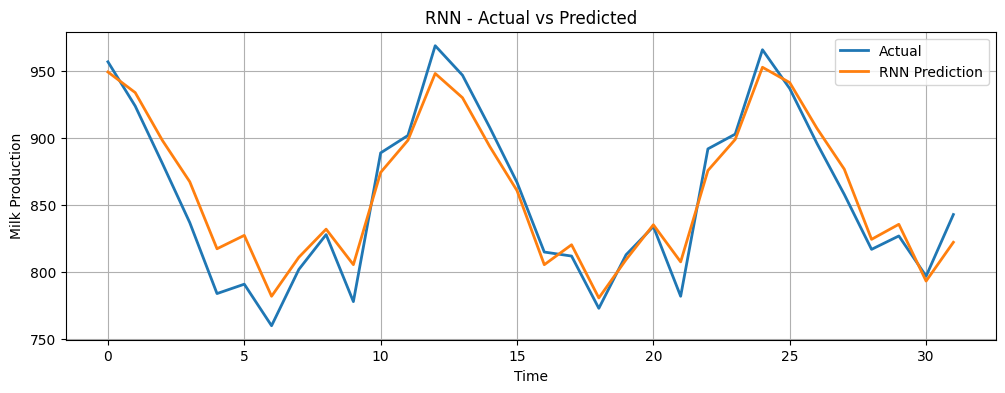

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step

LSTM Model Performance:
RMSE: 47.7052
MAE : 41.5005
MAPE: 4.73%


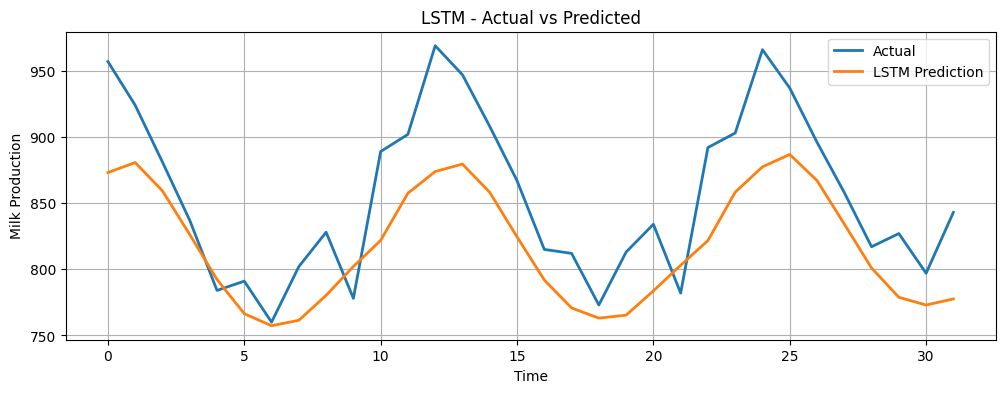

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

GRU Model Performance:
RMSE: 34.6437
MAE : 26.2462
MAPE: 3.07%


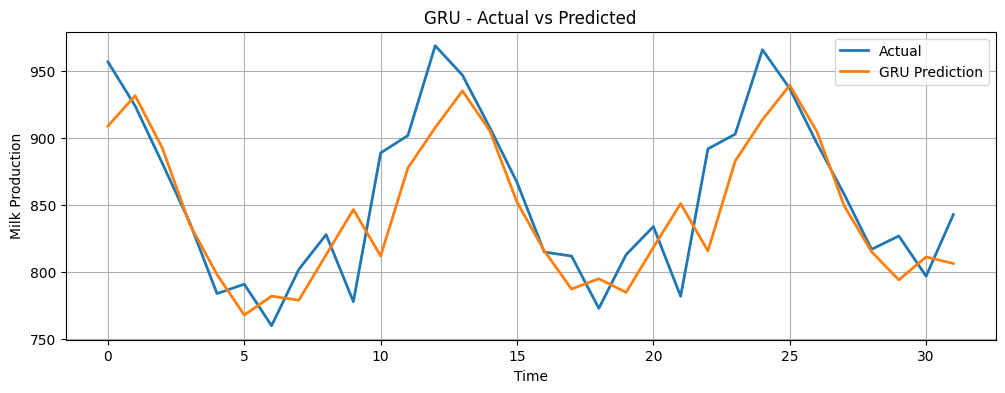

In [107]:
rnn_rmse, rnn_mae, rnn_mape = evaluate_model(rnn_model, X_test, y_test, "RNN")
lstm_rmse, lstm_mae, lstm_mape = evaluate_model(lstm_model, X_test, y_test, "LSTM")
gru_rmse, gru_mae, gru_mape = evaluate_model(gru_model, X_test, y_test, "GRU")

Compare the performance of RNN, LSTM, and GRU.

In [108]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["RNN", "LSTM", "GRU"],
    "RMSE": [rnn_rmse, lstm_rmse, gru_rmse],
    "MAE": [rnn_mae, lstm_mae, gru_mae],
    "MAPE (%)": [rnn_mape, lstm_mape, gru_mape]
})

print("\nComparison of Model Performance:")
print(results)


Comparison of Model Performance:
  Model       RMSE        MAE  MAPE (%)
0   RNN  16.553699  13.706551  1.629589
1  LSTM  47.705178  41.500462  4.725292
2   GRU  34.643727  26.246225  3.068612


#5.	Prediction and Visualization

o	Forecast milk production for the next 12 months.

o	Visualize the predicted trend with uncertainty or confidence intervals if possible.


Forecast milk production for the next 12 months.

In [109]:
#Forecast milk production for the next 12 months.
def forecast_future(model, last_sequence, months=12):
    seq = last_sequence.copy()
    predictions = []

    for _ in range(months):
        pred = model.predict(seq.reshape(1, window_size, 1))
        predictions.append(pred[0, 0])

        # slide window
        seq = np.append(seq[1:], pred[0, 0])

    predictions = np.array(predictions).reshape(-1, 1)
    return scaler.inverse_transform(predictions)

In [110]:
# last window from scaled data
last_sequence = scaled_data[-window_size:]

In [111]:
future_12_lstm = forecast_future(lstm_model, last_sequence, months=12)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [112]:
print("\nForecasted Milk Production for Next 12 Months (LSTM):")
print(future_12_lstm)


Forecasted Milk Production for Next 12 Months (LSTM):
[[796.9672 ]
 [797.88226]
 [823.434  ]
 [838.28455]
 [850.9622 ]
 [845.02185]
 [829.9919 ]
 [811.49005]
 [794.48004]
 [786.6901 ]
 [778.2661 ]
 [780.62115]]


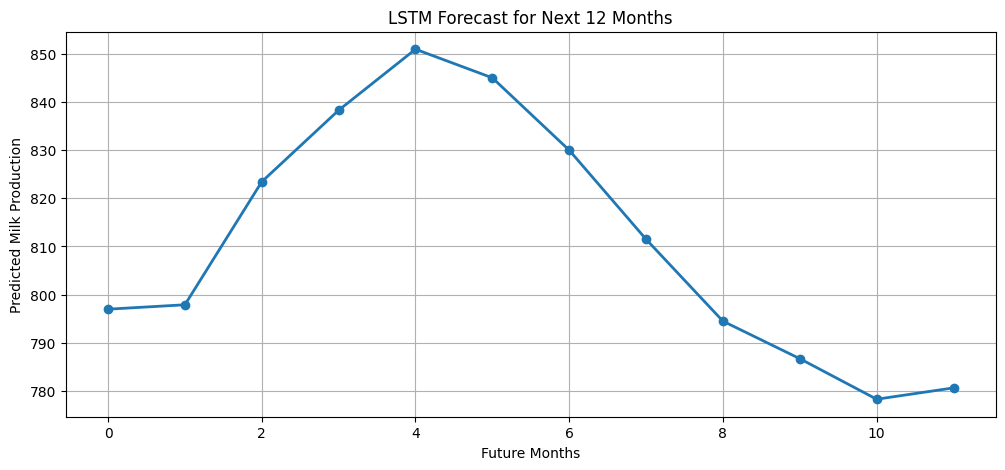

In [113]:
#Visualization of Future Trend
plt.figure(figsize=(12,5))
plt.plot(future_12_lstm, marker='o', linewidth=2)
plt.title("LSTM Forecast for Next 12 Months")
plt.xlabel("Future Months")
plt.ylabel("Predicted Milk Production")
plt.grid(True)
plt.show()

Visualize the predicted trend with uncertainty or confidence intervals if possible.

In [114]:
import numpy as np

In [117]:
def forecast_with_uncertainty(model, last_sequence, n_simulations=50, months=12):
    simulations = []

    for _ in range(n_simulations):
        seq = last_sequence.copy() + np.random.normal(0, 0.01, size=last_sequence.shape)
        preds = []

        for _ in range(months):
            pred = model.predict(seq.reshape(1, window_size, 1))
            preds.append(pred[0,0])
            seq = np.append(seq[1:], pred[0,0])

        simulations.append(preds)

    simulations = np.array(simulations)

    # Convert back to original scale
    simulations_inv = scaler.inverse_transform(simulations)

    mean_forecast = simulations_inv.mean(axis=0)
    lower_bound = np.percentile(simulations_inv, 5, axis=0)
    upper_bound = np.percentile(simulations_inv, 95, axis=0)

    return mean_forecast, lower_bound, upper_bound


mean_forecast, lower_ci, upper_ci = forecast_with_uncertainty(
    lstm_model, last_sequence, n_simulations=50, months=12
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

In [118]:
# Plot with Confidence Intervals
plt.figure(figsize=(12,6))

months = np.arange(1, 13)

<Figure size 1200x600 with 0 Axes>

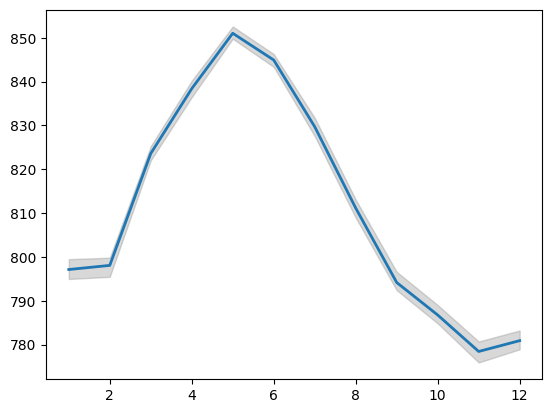

In [119]:
plt.plot(months, mean_forecast, label="Mean Forecast", linewidth=2)
plt.fill_between(months, lower_ci, upper_ci, color='gray', alpha=0.3,
                 label="90% Confidence Interval")

In [126]:
print(mean_forecast)
print(lower_ci)
print(upper_ci)

[797.1317  798.07263 823.6023  838.4011  851.0387  844.9321  829.7174
 811.15344 794.1718  786.7554  778.4327  780.9049 ]
[794.9748  795.4644  822.03357 836.45795 849.78925 843.3622  827.569
 808.9573  792.4074  784.8355  775.9228  778.9231 ]
[799.5004  799.82855 825.2888  840.2165  852.5862  846.29926 831.7435
 813.0875  796.6059  789.0285  780.71643 783.228  ]


/tmp/ipython-input-3769590656.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


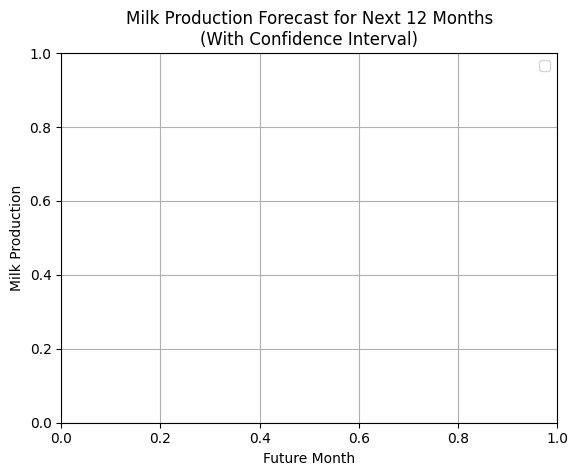

In [127]:
plt.title("Milk Production Forecast for Next 12 Months\n(With Confidence Interval)")
plt.xlabel("Future Month")
plt.ylabel("Milk Production")
plt.legend()
plt.grid(True)
plt.show()

#6. Business Insights

o Interpret results and recommend how the dairy business can use these forecasts for better planning and resource allocation.

**1. Better Production Planning**

The predicted milk production for the next 12 months helps the dairy business:

Anticipate seasonal peaks and low-production months.

Reduce underproduction risks by increasing supply (feed, staff, resources) before peak demand periods.

Avoid overproduction during low-demand seasons, minimizing wastage.

**2. Optimized Supply Chain & Distribution**

Accurate forecasts ensure:

Efficient transport scheduling and route planning.

Better inventory management of milk and milk-derived products (cheese, butter, yogurt).

Aligning production with market demand, reducing storage costs and spoilage.

**3. Workforce & Labor Management**


The business can adjust workforce allocation based on expected production:

Increase staffing during high-output months.

Schedule maintenance or staff leave during predicted low-production months.

Reduce labor overload by smoothing out operational bottlenecks.

**4. Resource Allocation & Cost Reduction**

Forecasts support:

Efficient planning of raw materials such as cattle feed, fodder, medicine, and storage capacity.

Reduction of unnecessary operational expenses during low-production periods.

Strategic investments in cold-storage or transport only when truly needed.

**5. Strategic Decision-Making & Expansion Planning**

The business can use long-term production trends to:

Decide whether to increase livestock capacity.

Assess feasibility of entering new markets or launching new dairy products.

Plan capital expenditures such as adding new dairy units, cooling tanks, or vehicles.

**6. Improved Revenue Forecasting**

By combining production predictions with market pricing:

The dairy can forecast monthly and annual revenue.

Better budget planning and financial forecasting become possible.

Helps management avoid financial risks during low production periods.

**7. Risk Management**

With confidence intervals (uncertainty ranges):

Management can prepare backup strategies for worst-case scenarios (lower bound).

Explore opportunities during best-case predictions (upper bound).

Helps build resilient future plans considering variability in production.